# Complex System Simulation: Corals and Flows
#### _Group 12: Esther Bakels (12362980), Loes Bijman (15211312), Aleksandar Jacimovic (15278247), Boyan Mihaylov (15067602)_

## 1. Imports / Preliminaries

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import custom modules
import vis_tools as vt
import dla_model as dm
import dla_simulation as ds
import cs_measures as cm

from importlib import reload

## 2. Flow Functions

In [62]:
# Reload modules
reload(vt)
reload(dm)

<module 'dla_model' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\dla_model.py'>

Animation movie is 29638982 bytes, exceeding the limit of 20971520.0. If you're sure you want a large animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB).


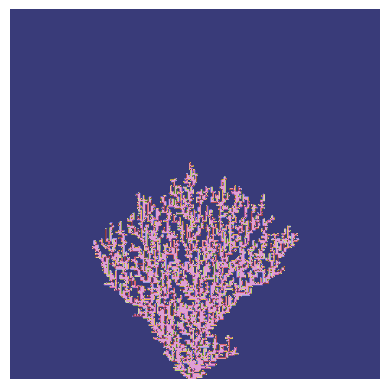

In [88]:
# Time / space parameters
size = 256
steps = 5000

# Environment parameters
Moore = False
obstacle = None
# drift_vec = [0, 0, -1]
# sun_vec = [0, 0, -1]
# periodic = (False, False, False)
drift_vec = [0, -1]
sun_vec = [0, -1]
periodic = (False, False)

# Initialize lattice
seeds = np.array([(int(size/2), 0)])
# seeds = np.array([(int(size/2), int(size/2), 0)])
lattice = dm.init_lattice(size, seeds)

# Initialize obstacle lattice
if obstacle is not None:
    boxes = np.array([[15,17,19,35,10,20], [40, 45, 50, 55, 60, 55]])
    obstacle = dm.init_obstacle_lattice(size, boxes=boxes, seed_coords=seeds)
    print(np.sum(obstacle))

# Initialize particles
particle_density = 0.1
particles = dm.init_particles(lattice, particle_density, obstacles=obstacle)

# Arrays for storing time frames
# lattice_frames = np.empty((steps, size, size, size))
lattice_frames = np.empty((steps, size, size))
particles_frames = np.empty_like(lattice_frames)

current_lattice = np.array(lattice)
current_particles = np.array(particles)
for step in range(steps):
    
    # Record current state
    lattice_frames[step] = np.array(current_lattice)
    particles_frames[step] = dm.particles_to_lattice(current_particles, size)

    # Move particles
    current_particles = dm.move_particles_diffuse(current_particles, current_lattice, periodic=periodic, moore=Moore, obstacles=obstacle, drift_vec=drift_vec, regen_bndry=False)

    # Aggregate particles
    current_lattice, current_particles = dm.aggregate_particles(current_particles, current_lattice, None, moore=Moore, obstacles=obstacle, sun_vec=sun_vec)
    # print(f"step {step}: {current_lattice}")

# vt.animate_lattice(lattice_frames, interval=100)
vt.animate_lattice((lattice_frames*5 + particles_frames)/6, interval=100)
# obstacle_frames = np.array([obstacle for _ in lattice_frames])
# vt.animate_lattice((lattice_frames*5 + particles_frames + obstacle*2)/8, interval=100)

## 3. Fractal Dimension

In [89]:
# Reload modules
reload(cm)
reload(vt)

<module 'vis_tools' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

256
[2.         1.5        1.46410581 1.48854908 1.53448507 1.58627823
 1.59695212 1.55733287]


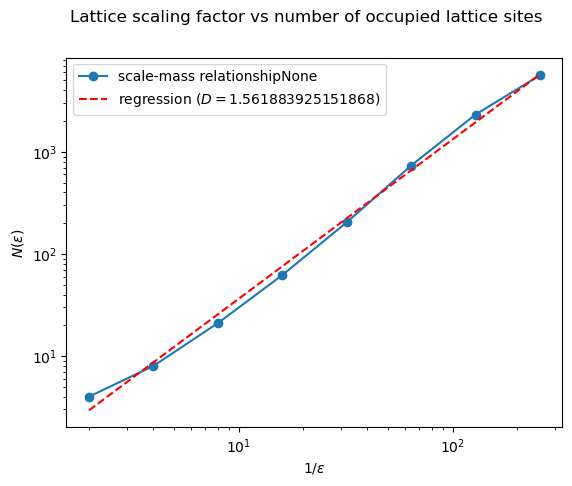

In [90]:
print(current_lattice.shape[0])
fractal_dims, scales, n_boxes, coeffs = cm.fractal_dimension_clusters(current_lattice)

print(fractal_dims)

vt.plot_fractal_dimension(scales, n_boxes, coeffs)

## 4. Branching Distribution

In [96]:
reload(cm)
reload(vt)

<module 'vis_tools' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
Power-law-over-exponential-likelihood: 105.78582774189165, p = 1.4003373512479164e-06
185


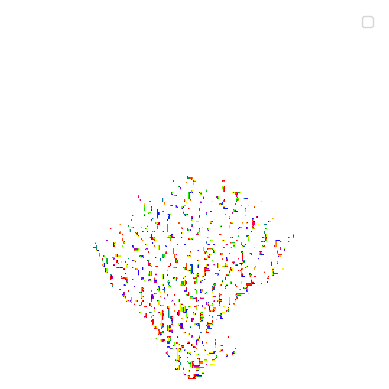

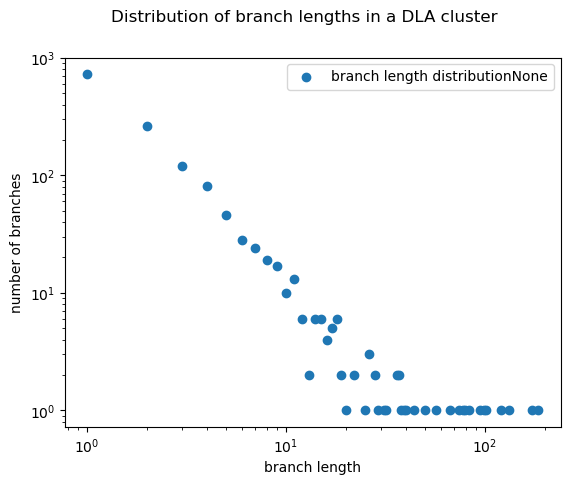

In [97]:
branch_lengths, branch_length_counts, branches = cm.branch_distribution(current_lattice, seeds[0])
# print(type(branches))
# print(branches)
print(len(branches[0]))
# print(np.array(branches))
vt.plot_branches(branches, current_lattice)
vt.plot_branch_length_distribution(branch_lengths, branch_length_counts)

## 5. Simulation Series

In [47]:
# Reload modules
reload(dm)
reload(ds)
reload(cm)
reload(vt)

<module 'vis_tools' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

In [29]:
# Define environment parameter series
lattice_size_series = np.array([128])
max_timesteps_series = np.array([5000])
seeds_series = np.array([[[32, 32]]])
particle_density_series = np.array([0.1])
target_mass_series = np.array([int(0.025 * lattice_size_series[0]**2), int(0.05 * lattice_size_series[0]**2)])
obstacle_box_series = np.array([None])
drift_vec_series = np.array([[-1, 0]])
sun_vec_series = np.array([[-1, 0]])

# Define fixed simulation parameters
radius_scale_mode = True
track_radius = True
periodic = (False, True)
move_moore = False
aggr_moore = False
regen_mode = None

# Run simulations
n_sims = 5
sim_results, dla_evolutions = ds.analyse_fractal_dimension(n_sims, lattice_size_series, max_timesteps_series, seeds_series, particle_density_series, target_mass_series,
                                                           obstacle_box_series=obstacle_box_series, drift_vec_series=drift_vec_series, sun_vec_series=sun_vec_series,
                                                           radius_scale_mode=radius_scale_mode, n_saved_sims=1, track_radius=track_radius,
                                                           periodic=periodic, move_moore=move_moore, aggr_moore=aggr_moore, regen_mode=regen_mode)

sim_results

Running parameters: lattice_size: 128; max_timesteps: 5000; seeds: [[32 32]]; particle_density: 0.1; target_mass: 409
Running simulation 1 of 5
Running simulation 2 of 5
Running simulation 3 of 5
Running simulation 4 of 5
Running simulation 5 of 5
Running parameters: lattice_size: 128; max_timesteps: 5000; seeds: [[32 32]]; particle_density: 0.1; target_mass: 819
Running simulation 1 of 5
Running simulation 2 of 5
Running simulation 3 of 5
Running simulation 4 of 5
Running simulation 5 of 5


[{'lattice_size': 128,
  'max_timesteps': 5000,
  'seeds': [array([32, 32])],
  'particle_density': 0.1,
  'target_mass': 409,
  'dim_box_series': array([0.        , 0.        , 0.        , 0.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.5849625 , 1.5849625 , 1.5849625 , 1.5849625 ,
         1.5849625 , 1.5849625 , 1.5849625 , 2.        , 2.        ,
         2.        , 2.        , 1.72270623, 1.39794001, 1.5563025 ,
         1.5563025 , 1.5563025 , 1.5563025 , 1.69019608, 1.62142893,
         1.71326936, 1.52037507, 1.59327954, 1.59327954, 1.59327954,
         1.59327954, 1.65922966, 1.7194374 , 1.7194374 , 1.54395931,
         1.63973851, 1.56275624, 1.63498514, 1.63498514, 1.63498514,
         1.66797   , 1.69917101, 1.72877124, 1.75692697, 1.75692697,
         1.75692697, 1.78377265, 1.78377265, 1.78377265, 1.80942478,
         1.80942478, 1.77831744, 1.80245543, 1.80245543, 1.69118005,
         1.64914987, 1.6682

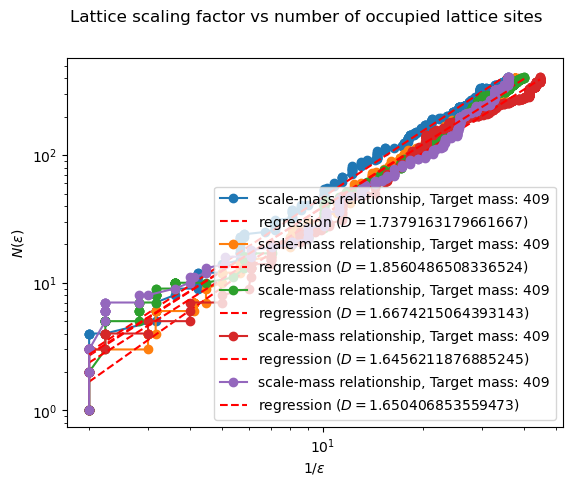

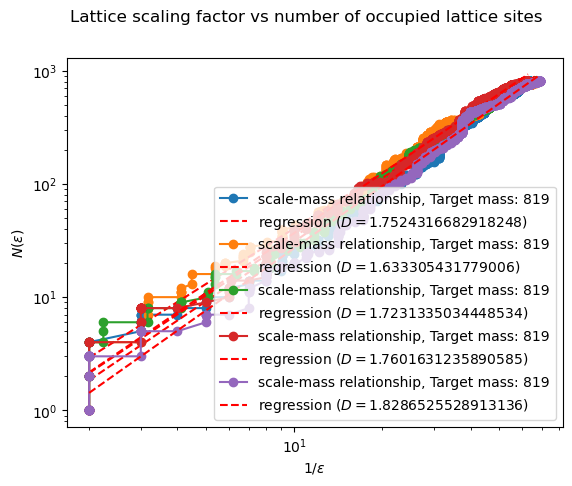

In [50]:
# Unpack results
# scale_series_results = [sr['scale_series'] for sr in sim_results]



for tm in target_mass_series:
    results_filtered = [sr for sr in sim_results if sr['target_mass'] == tm]
    fig, ax = plt.subplots()
    for rf in results_filtered:
        scale_series_results = rf['scale_series']
        n_boxes_results = rf['n_box_series']
        coeffs_results = rf['coeffs']
        vt.plot_fractal_dimension(scale_series_results, n_boxes_results, coeffs_results, ax=ax, label=f", Target mass: {tm}")

plt.show()